## Unit 2 Project

This notebook contains some additional hints to the project for unit 2. 

**Softmax Function**

Softmax is used in multiclass classification problems where we need to estimate the probabilities of multiple classes using a single model.

See the excel sheet **"Softmax Function"** for numerical example of softmax.

For the project you will need to impliment a softmax function. Below are some hints on how you can do that

1. Theta will be a matrix of dimension (k,d), where k is number of classes and d refers to the number of features:

$$Theta = \begin{bmatrix}
\Theta_0\\
\Theta_1\\
\vdots\\
\Theta_n
\end{bmatrix}
= \begin{bmatrix}
\theta_{00}&\theta_{01}&\dots\theta_{0d}\\
\theta_{10}&\theta_{11}&\dots\theta_{1d}\\
\theta_{20}&\theta_{21}&\dots\theta_{2d}\\
\vdots\\
\theta_{k0}&\theta_{n1}&\dots\theta_{kd}
\end{bmatrix}
$$

2. Data Matrix will be $X$ of dimension (n,d) with each row representing an d dimensional data point.

$$
X = \begin{bmatrix}
x_{00}& x_{01}&\dots&x_{0d}\\
x_{10}& x_{11}&\dots&x_{1d}\\
x_{20}& x_{21}&\dots&x_{2d}\\
\vdots\\
x_{n0}& x_{n1}&\dots&x_{nd}\\
\end{bmatrix}
$$

3. To get the softmax we can first compute the following:

$$Theta \times X^T = \begin{bmatrix}
\theta_{00}&\theta_{01}&\dots\theta_{0d}\\
\theta_{10}&\theta_{11}&\dots\theta_{1d}\\
\theta_{20}&\theta_{21}&\dots\theta_{2d}\\
\vdots\\
\theta_{k0}&\theta_{n1}&\dots\theta_{kd}
\end{bmatrix} \times  \begin{bmatrix}
x_{00}& x_{10}&\dots&x_{n0}\\
x_{01}& x_{11}&\dots&x_{n1}\\
x_{02}& x_{12}&\dots&x_{n2}\\
\vdots\\
x_{0d}& x_{1d}&\dots&x_{nd}\\
\end{bmatrix}
$$

$$exp(Theta \times X^T ) = exp(\begin{bmatrix}
\theta_{00}&\theta_{01}&\dots\theta_{0d}\\
\theta_{10}&\theta_{11}&\dots\theta_{1d}\\
\theta_{20}&\theta_{21}&\dots\theta_{2d}\\
\vdots\\
\theta_{k0}&\theta_{n1}&\dots\theta_{kd}
\end{bmatrix} \times  \begin{bmatrix}
x_{00}& x_{10}&\dots&x_{n0}\\
x_{01}& x_{11}&\dots&x_{n1}\\
x_{02}& x_{12}&\dots&x_{n2}\\
\vdots\\
x_{0d}& x_{1d}&\dots&x_{nd}\\
\end{bmatrix})$$

4. Find the column sums and divide by result above to get the softmax


**Log Loss**

The project also demands that you write the implimentation of log-loss, which is a loss function used to measure how far off a multiclass classifier is. Refer to the sheet **log loss** for an intuitive explanation.


To compute the log loss using numpy over a matrix of probabilities obtained by using softmax function described above, observe that the output of softmax will look as given below:

$$ P = \begin{bmatrix}
p_{c=0,0}& p_{c=0,1}&\dots&p_{c=0,n}\\
p_{c=1,0}& p_{c=1,1}&\dots&p_{c=1,n}\\
p_{c=2,0}& p_{c=2,1}&\dots&p_{c=2,n}\\
\vdots\\
p_{c=k,0}& p_{c=k,1}&\dots&p_{c=k,n}\\
\end{bmatrix}$$

Now for the sake of discussion lets assume that the y vector looks as below

$Y = [3,5,0..1]$

This means that the probability corresponding to the first label in y is the 4th element in the first column of probability matrix. We can use numpy function 

```python
import numpy as np
np.choose(labels, probabilities)
```
to choose probabilities corresponding to the labels

In [1]:
import numpy as np

In [2]:
choices = np.array([[0, 1, 2, 3], [10, 11, 12, 13],
[20, 21, 22, 23], [30, 31, 32, 33]])
choices

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [3]:
choices.shape

(4, 4)

In [4]:
np.choose([2, 3, 1, 0], choices)

array([20, 31, 12,  3])

**Gradient Descent For Log Loss**

In [5]:
from scipy.sparse import coo_matrix

In [9]:
num_labels = 10
num_examples = 10 ## rows in data
Y = [0,0,1,1,2,2,3,3,4,5] ## labels in data
M = coo_matrix(([1]*num_examples, (Y,range(num_examples))), shape=(num_labels,num_examples)).toarray()

In [10]:
M

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

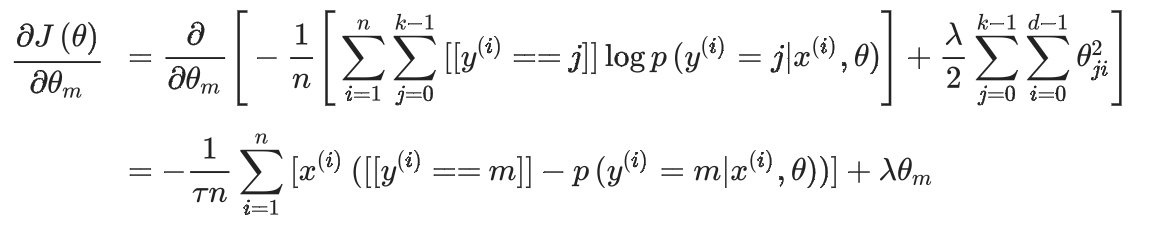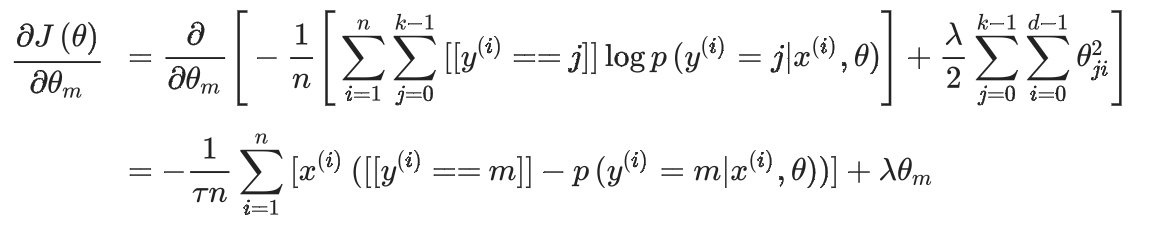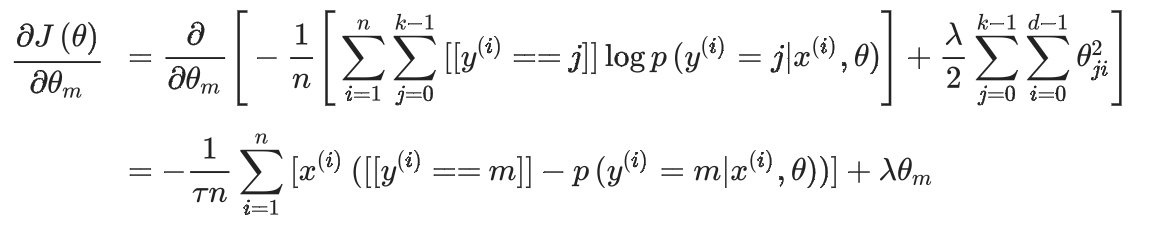The gradient for the loss as given in ![](../gradient_ll.png)

The first part of the loss can be computed by the follwing experession:


$\frac{1}{rn}*(M-Probabilities).X$

The second is simply the scalar product of lambda and theta matrix